<a href="https://colab.research.google.com/github/cu-applied-math/appm-4600-numerics/blob/main/Labs/Lab02_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Scientific Programming Workflow. APPM 4600

Components:
- TA demonstration
  - The TA will show his/her IDE (e.g., VSCode) and git setups

1. Organizing files and experiments
    - Main algorithms go in "modules" (`.py` files)
    - Demonstrate things using "driver" files, often in Jupyter notebooks (`.ipynb` files)
    - If you update your modules, you need to make sure changes are propagated
    - We discuss iPython [line and cell "magics"](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
    - Using your IDE (or even colab), learn shortcut keys!
        - evaluating a cell
        - toggle block comments
        - end of line, beginning of line
2. Using "git"
    - Benefits
    - Integration with github
    - Make "[pull request](https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/about-pull-requests)" for the class website
3. Looking at the accuracy of two algorithms
    - How to evaluate $$f(x) = (x-3)^2 = x^2 - 6x + 9$$ carefully when $x \approx 3$
    - Which formula is better?

Please skim all instructions first before starting to work

Note: if you are a complete beginniner to Python, we suggest you spend some time the first few weeks of class learning the basics. There are plenty of good online tutorials, and many of them are interactive and give feedback.

Copyright 2025, Department of Applied Mathematics, University of Colorado Boulder. Released under the BSD 3-Clause License

Learning objectives
- When to use `.py` files and when to use `.ipynb` files
- Become more familiar with an [IDE](https://en.wikipedia.org/wiki/Integrated_development_environment) of your choice, including learning keyboard shortcuts
- Understand what "git" is and differences with "github", and when to use them and what purpose they serve
- Observe that two equivalent mathematical formula are not numerically equivalent

## 1. Organizing files in Python

A standard `.py` file, aka a module file, is the workhorse file type for Python. For a professional software project they can be fancy, but they can also be bare-bones for quick-and-dirty work. Just put in your function definitions!

The one thing worth mentioning is that it's import to document your code. There are two main ways to do this:
- doc strings, which are the official documentation strings that go right below the function definition. This is public-facing and should be useful for the average user
- comments in the code. This will not be seen by the average user, but will be useful for anyone who wants to understand your code (e.g., your teacher!).  It's also very useful for yourself... so that when you revisit your code in 6 months, you can remember what it was you were doing


The other kind of file we often see in this class is a jupyer notebook `.ipynb` file (that's what this colab file is). These have both *code* and *text* cells.  These are great ways to do homeworks (or labs) since you can interleave text and code. They are also **interactive** so great for plotting.

**Task**

Run the following set of cells and follow along with the comments.

This demo works best if you do it in VSCode or another fully featured IDE, like "Jupyter Lab" or Spyder or PyCharm.

We can do it in Colab but it's a bit hacky.   Run the following cell (but if you're in VSCode, you can just create a new file called `myalgorithms.py` and copy-and-paste the code block in `str` into `myalgorithms.py`):

In [2]:
import numpy as np
# We make some function, such as calculating pi
# using the https://en.wikipedia.org/wiki/Basel_problem result
str = '''import numpy as np
def calculate_pi(n_terms):
  s = 0.
  for k in range(1,n_terms):
    s += 1/(k**2)
  return 6*s'''

file_path = 'myalgorithms.py'
with open(file_path, "w") as file:
    file.write(str)

This is just a silly function to calculate a few digits of pi using the Basel problem result, which says that
$$\frac{\pi^2}{6} = \sum_{k=1}^\infty \frac{1}{k^2}$$

Double-check that we correctly wrote to the file by asking the operating system to display the contents of the file:

(Note: the "!" is a special command that jupyter/colab recognizes, and it means that the following line of code is *not* Python but rather a shell command that interacts directly with the operating system)

In [3]:
! cat myalgorithms.py

import numpy as np
def calculate_pi(n_terms):
  s = 0.
  for k in range(1,n_terms):
    s += 1/(k**2)
  return 6*s

In [4]:
# Let's use it
import myalgorithms
pi = myalgorithms.calculate_pi(1000)
print(f'my estimate of pi is {pi:.100f}')

my estimate of pi is 9.8636014000893688091764488490298390388488769531250000000000000000000000000000000000000000000000000000


Oops! We forgot to take the square root. Let's update the code

In [5]:
str = '''import numpy as np
def calculate_pi(n_terms):
  s = 0.
  for k in range(1,n_terms):
    s += 1/(k**2)
  return np.sqrt(6*s)  # don't forget the square root!'''

file_path = 'myalgorithms.py'
with open(file_path, "w") as file:
    file.write(str)

# and verify that the file is changed:
! cat myalgorithms.py

import numpy as np
def calculate_pi(n_terms):
  s = 0.
  for k in range(1,n_terms):
    s += 1/(k**2)
  return np.sqrt(6*s)  # don't forget the square root!

In [6]:
# Now let's try it again:
import myalgorithms
pi = myalgorithms.calculate_pi(1000)
print(f'my estimate of pi is {pi:.100f}')

my estimate of pi is 9.8636014000893688091764488490298390388488769531250000000000000000000000000000000000000000000000000000


What happened!?  Our changes didn't take effect.

We need to tell jupyter (aka iPython) to reload things appropriately.  You can do this with the [importlib](https://www.geeksforgeeks.org/python/importlib-package-in-python/) package, but there's a much easier option.  Following these [instructions](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html), we're going to use some iPython "magic" commands:

```python
%load_ext autoreload
%autoreload 2
# Note: make sure you don't put anything, even a comment, on the rest of the lines above

# Note: this quick hack only works if you have Python version less than 3.12
# (or Python 3.12 but an updated iPython; you can run !pip install Ipython --upgrade  )
```
If we just put the above commands in a code cell in a jupyter notebook and run the cell, the changes still won't be reflected. The gist is that `autoreload ` is looking for changes in files, and once it detects a change, the file is reloaded. But in this case we started `autoreload` *after* we changed `myalgorithms.py`, so it will not reload `myalgorithms.py` . To fix this, make a change in `myalgorithms.py`and save the file. Then undo that change and save the file. To not encounter this issue in practice, make the `autoreload` commands the first thing you run in your jupyter notebook.


However, this doesn't work in colab due to the versions of python/ipython, so we'll do it using `importlib`:

In [7]:
from importlib import reload

reload(myalgorithms)

<module 'myalgorithms' from '/Users/n1le/Documents/Classes/APPM 4600/appm-4600-numerics/Labs/myalgorithms.py'>

In [8]:
pi = myalgorithms.calculate_pi(1000)
print(f'my estimate of pi is {pi:.100f}')

my estimate of pi is 3.1406371009859399556773951189825311303138732910156250000000000000000000000000000000000000000000000000


Now that we have a good module, with the main algorithm, we can demonstrate the usefulness of the "driver" code, which works great in a (jupyter/colab) notebook. Think of the "driver" code as the actual experiment.  Below is an example:

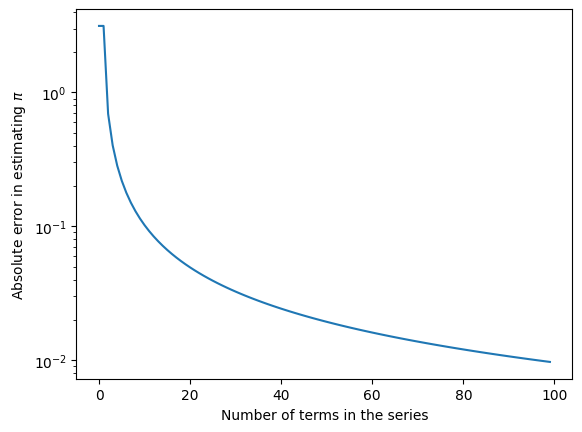

In [9]:
from matplotlib import pyplot as plt
error = []
for n in range(100):
    error.append( abs(np.pi-myalgorithms.calculate_pi(n)) )
plt.semilogy(error)
plt.xlabel('Number of terms in the series')
plt.ylabel('Absolute error in estimating $\\pi$')
plt.show()

**Deliverables**

Since this part of the lab is about programming practices, for the deliverable, I want you to tell me what are the keyboard shortcuts (for whichever IDE you used) for the following commants:
- toggle commenting a line of code
- executing a cell
- moving the cursor to the beginning of a line of code
- moving the cursor to the end of a line of code

## 2. git

[git](https://en.wikipedia.org/wiki/Git) is a distributed version control system.  You can use it locally on your own computer without any internet connection, and it provides a nice way to track changes to a file. The idea is that you "commit" the state of a file every so often, but then you can later revisit the code at a previous stage in case you want to revert changes.

But it's even more than that: it allows different people to work on code, and update different parts of it.  If two people edit the same part of code and both want to commit, it will detect a "conflict" and assist you in resolving it.

Each "project" is called a "repository" or "repo" for short.

To make it very useful, it's great to use it with the internet, and have it hosted. One of the most popular hosting sites is [github](https://github.com/). Here you can create your own or join someone elses "repo".  A repo can be either public or private.  For a public repo, anyone can see it, but not just anyone can make changes.  If you're on an approved list of editors, then you can make changes. If you're not pre-approved, you cannot directly make changes to a repo on github, but you can request a change. This is called a "pull request".

There are many ways to use git:
- command line, aka CLI (for Command Line Interface)
- dedicated software, like [github desktop](https://desktop.github.com/download/) that you install. Other examples include Sourcetree, GitKraken, Fork, Sublime Merge, SmartGit, and TortoiseGit.
- it is integrated into a lot of software, like Matlab's IDE, VS Code, etc.
- via web interfaces, such as via the github website. Click the little "pencil" icon to make changes!

There's no single best way. You might make most of your git changes via command line since it's very quick, but then if you detect a complicated conflict, use a dedicated software like "github desktop" to resolve the conflict.

**Task**

Your task is to:
- Make a github account
- Signed into your account, make a "pull request" that changes our [syllabus](https://github.com/cu-applied-math/appm-4600-numerics/blob/main/policies.md). For example, you could change the statement "You are allowed to drop 1 homework" to become "You are allowed to drop 10 homeworks".  (Don't worry, we will reject most of these pull requests... unless we like your suggested change!)

**Deliverable**

In the PDF or html file that you upload to Canvas, write down your github username, so that we can see that you have indeed made a pull request.


# 3. Testing out two formulas
Let's evaluate $f(x) = (x-3)^2 = x^2 - 6x + 9$ via two different methods, i.e., using the two different equivalent formulas.

If we evaluate at a point like $x=5$ or $x=-19$, it doesn't really matter which formula we use. The accuracy is fine either way.

If we evaluate at a point $x=3+\epsilon$ for a small $\epsilon$, now things start to matter.

**Task**

Determine which method is better, i.e., which one is more **stable** when $x\approx 3$.

**Deliverable**

Write a few sentences about why you think one implementation is better than the other.  Use data to support your answer.  Check for numbers like $x=3+10^{-5}$

(Don't stress about this, since the lab is pass/fail. Any reasonable attempt will be a "pass")

**Q: How do we know what the true answer is?**

- create a special function fp3 (similar to `numpy.expm1` or `numpy.logp1` which are functions that given an input $\epsilon$, they calculate the function in question, either $e^x$ or $\log(x)$, for $\epsilon-1$ (the m1 is for minus 1) or $\epsilon+1$ (the p1 is for plus 1))
  - so in this case, create the function fp3 such that $\text{fp3}(\epsilon) = f(\epsilon+3)$
- use extended precision: see our [How to check your answer using extended precision](https://github.com/cu-applied-math/appm-4600-numerics/blob/main/Demos/HowToCheckYourAnswerUsingExtendedPrecision.ipynb) demo
- use lower precision: use double precision as the "ground truth" and *single* precision as the precision that you are working in.

In [ ]:
|